<h1>Part 06 : Machine Learning - Regression</h1>
<h7>Regression analysis is a statistical technique of measuring the relationship between variables. It provides the values of the dependent variable from the value of an independent variable. The main use of regression analysis is to determine the strength of predictors, forecast an effect, a trend, etc. For example, a gym supplement company can use regression analysis techniques to determine how prices and advertisements can affect the sales of its supplements.</h7>
<a href="https://www.turing.com/kb/regression-analysis-techniques-in-data-science">Read article</a>

<h7>Usually, regression can be used when there is a correlation between independent and dependent variables. This correlation can be obtained, for example, from the Pearson correlation coefficient, which is a number in the range [-1, +1].
A positive correlation coefficient means that as one variable increases, the other variable also increases and vice versa, but a negative correlation coefficient indicates an inverse relationship between two variables, that is, as one variable increases, the other decreases and vice versa. A coefficient of zero means that there is no relationship between two variables and the two variables are independent of each other.
</h7>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,
                            mean_squared_error,
                            mean_absolute_percentage_error,
                            max_error, 
                            r2_score

SyntaxError: trailing comma not allowed without surrounding parentheses (3592948397.py, line 9)

<h2>Step_0 : Problem Definition</h2>
<h7>Predicting the BitCoin Closing Price for Tomorrow by Linear Regression</h7>

<h2>Step_1 : Data Collection</h2>

In [3]:
bt = pd.read_csv('../Datasets/Binance_BTCUSDT_d.csv')

<h2>Step_2 : Data understanding or Exploratory Data Analysis (EDA)</h2>

In [4]:
bt.head()

,unix,date,symbol,open,high,low,close,VolumeBTC,VolumeUSDT,tradecount,EMA,SMA,RSI
0,1504137600,8/31/2017,BTC/USDT,4555.14,4745.42,4555.14,4724.89,550.18,2548384.43,NaN,4254.512857,4254.512857,67.858274
1,1504224000,9/1/2017,BTC/USDT,4724.89,4885.55,4654.88,4834.91,554.18,2634056.29,NaN,4294.596476,4285.927857,70.679466
2,1504310400,9/2/2017,BTC/USDT,4834.91,4939.19,4286.87,4472.14,888.18,4072965.36,NaN,4351.968946,4337.823571,53.884720
3,1504396800,9/3/2017,BTC/USDT,4472.14,4714.76,4298.33,4509.08,666.62,3011023.50,NaN,4416.361087,4361.549286,55.055846
4,1504483200,9/4/2017,BTC/USDT,4509.08,4527.49,3972.51,4100.11,1309.91,5550545.61,NaN,4423.798275,4391.748571,42.260035


In [5]:
bt.shape

(1917, 13)

In [6]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        1917 non-null   int64  
 1   date        1917 non-null   object 
 2   symbol      1917 non-null   object 
 3   open        1917 non-null   float64
 4   high        1917 non-null   float64
 5   low         1917 non-null   float64
 6   close       1917 non-null   float64
 7   VolumeBTC   1917 non-null   float64
 8   VolumeUSDT  1917 non-null   float64
 9   tradecount  1807 non-null   float64
 10  EMA         1917 non-null   float64
 11  SMA         1917 non-null   float64
 12  RSI         1917 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 194.8+ KB


In [7]:
bt.describe()

,unix,open,high,low,close,VolumeBTC,VolumeUSDT,tradecount,EMA,SMA,RSI
count,1.917000e+03,1917.000000,1917.000000,1917.00000,1917.000000,1917.000000,1.917000e+03,1.807000e+03,1917.000000,1917.000000,1917.000000
mean,1.500334e+12,19576.162973,20129.676740,18938.97036,19582.435743,66419.027582,1.435984e+09,1.245879e+06,19527.383549,19534.997223,51.504061
std,3.724782e+11,16880.318548,17345.037996,16339.40510,16877.076827,70499.111963,1.786305e+09,1.576211e+06,16799.672821,16833.527728,13.990652
min,1.504138e+09,3189.020000,3276.500000,2817.00000,3189.020000,288.140000,1.261368e+06,1.241700e+04,3472.761187,3422.697857,10.497797
25%,1.545437e+12,7317.300000,7494.810000,7128.86000,7317.440000,30448.679540,2.470232e+08,2.924345e+05,7259.789596,7259.285000,41.670814
50%,1.586822e+12,10440.670000,10799.000000,10128.01000,10446.250000,46368.284100,5.564364e+08,6.993130e+05,10497.854760,10430.136430,50.317825
75%,1.628208e+12,32144.510000,33298.780000,30420.00000,32144.510000,74115.630790,2.178777e+09,1.528650e+06,33249.048860,33172.398570,60.631508
max,1.669594e+12,67525.820000,69000.000000,66222.40000,67525.830000,760705.362800,1.475838e+10,1.453060e+07,63890.256780,63925.075000,93.459276


<h2>Step_3 : Data Cleaning</h2>

In [8]:
bt.isna().sum()

unix            0
date            0
symbol          0
open            0
high            0
low             0
close           0
VolumeBTC       0
VolumeUSDT      0
tradecount    110
EMA             0
SMA             0
RSI             0
dtype: int64

In [9]:
bt[bt['tradecount'].isna()]

,unix,date,symbol,open,high,low,close,VolumeBTC,VolumeUSDT,tradecount,EMA,SMA,RSI
0,1504137600,8/31/2017,BTC/USDT,4555.14,4745.42,4555.14,4724.89,550.18,2.548384e+06,NaN,4254.512857,4254.512857,67.858274
1,1504224000,9/1/2017,BTC/USDT,4724.89,4885.55,4654.88,4834.91,554.18,2.634056e+06,NaN,4294.596476,4285.927857,70.679466
2,1504310400,9/2/2017,BTC/USDT,4834.91,4939.19,4286.87,4472.14,888.18,4.072965e+06,NaN,4351.968946,4337.823571,53.884720
3,1504396800,9/3/2017,BTC/USDT,4472.14,4714.76,4298.33,4509.08,666.62,3.011024e+06,NaN,4416.361087,4361.549286,55.055846
4,1504483200,9/4/2017,BTC/USDT,4509.08,4527.49,3972.51,4100.11,1309.91,5.550546e+06,NaN,4423.798275,4391.748571,42.260035
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1513209600,12/14/2017,BTC/USDT,16033.29,16445.00,15450.00,16334.98,11220.26,1.797144e+08,NaN,13596.484050,13608.050710,75.246357
106,1513296000,12/15/2017,BTC/USDT,16334.98,17991.00,16298.45,17539.83,8999.13,1.566451e+08,NaN,13921.391510,14072.052140,78.490080
107,1513382400,12/16/2017,BTC/USDT,17539.83,19539.00,17190.01,19102.66,4118.28,7.473658e+07,NaN,14243.203310,14554.683570,81.818239
108,1513468800,12/17/2017,BTC/USDT,19102.66,19798.68,18510.00,18860.02,8980.73,1.721134e+08,NaN,14682.753530,15141.301430,79.754958


In [10]:
bt.tradecount.unique()

array([     nan,   91956.,  116569., ..., 3817130., 3362221.,   74285.])

In [11]:
bt.dropna(subset = ['tradecount'], inplace = True)

In [12]:
bt.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'VolumeBTC',
       'VolumeUSDT', 'tradecount', 'EMA', 'SMA', 'RSI'],
      dtype='object')

In [13]:
bt.head()

,unix,date,symbol,open,high,low,close,VolumeBTC,VolumeUSDT,tradecount,EMA,SMA,RSI
110,1513555200000,12/18/2017 00:00,BTC/USDT,18860.04,19300.00,17029.98,18856.25,10624.63307,196339245.7,91956.0,15750.46714,16210.72000,79.721319
111,1513641600000,12/19/2017 00:00,BTC/USDT,18856.25,18950.00,16300.00,17295.20,13210.74822,232790625.9,116569.0,16164.57152,16721.88143,66.293528
112,1513728000000,12/20/2017 00:00,BTC/USDT,17295.20,17720.35,14777.66,16488.98,13450.49669,221193892.5,129762.0,16523.46199,16989.39214,60.615050
113,1513814400000,12/21/2017 00:00,BTC/USDT,16480.52,17309.50,14022.00,15492.64,20324.21730,320176825.3,117731.0,16626.36039,16981.53357,54.412142
114,1513900800000,12/22/2017 00:00,BTC/USDT,15514.03,15699.34,10961.00,13326.61,36076.27118,477509934.7,243261.0,16608.04300,16953.86500,43.895512


In [14]:
bt.shape

(1807, 13)

<h2>Step_4 : Outlier Detection and Treatment</h2>

<h4>Box Plot</h4>
<h7>It is a graph that gives a visual indication of how a data set's 25th percentile, 50th percentile, 75th percentile, minimum, maximum and outlier values are spread out and compare to each other.</h7>

In [15]:
bt1 = bt[['open' , 'high' , 'low', 'close', 'EMA', 'SMA', 'RSI']]
bt2 = bt[['VolumeBTC', 'VolumeUSDT', 'tradecount']]

<Axes: >

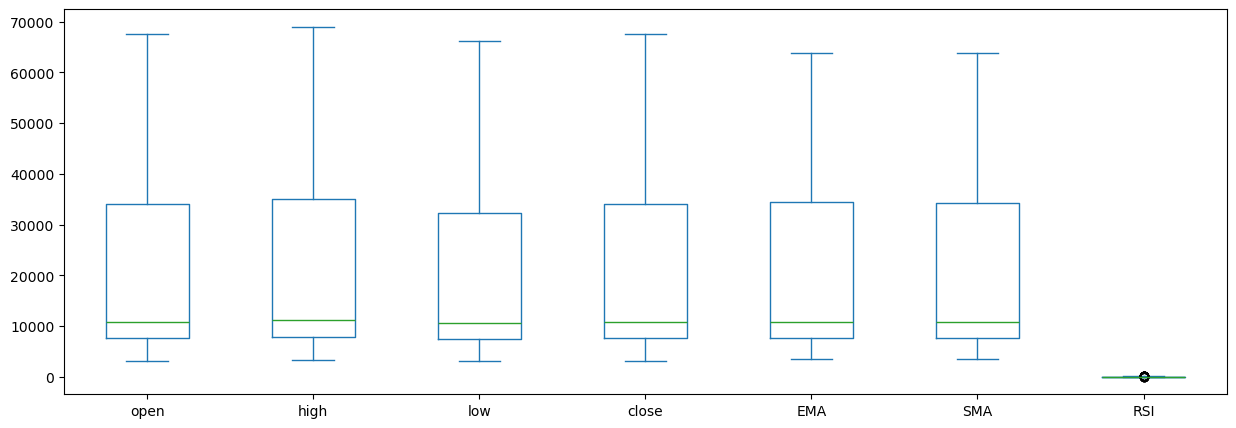

In [16]:
# Box plot of bt1
bt1.plot.box(figsize = (15, 5))

In [17]:
bt.open.max()

67525.82

In [18]:
bt.open.min()

3211.71

In [19]:
bt.RSI.max()

89.99215896

In [20]:
bt.RSI.min()

10.49779737

In [21]:
# Box plot of bt2  ==> This has outlier

In [22]:
# Method 1 : Without text on charts
''''fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 9))

bt2['VolumeUSDT'].plot.box(ax = axes[0])

bt2['VolumeBTC'].plot.box(ax = axes[1])
axes[1].set_title('VolumeBTC')

bt2['tradecount'].plot.box(ax = axes[2])
axes[2].set_title('TradeCount')

plt.tight_layout()
plt.show()'''''

"'fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 9))\n\nbt2['VolumeUSDT'].plot.box(ax = axes[0])\n\nbt2['VolumeBTC'].plot.box(ax = axes[1])\naxes[1].set_title('VolumeBTC')\n\nbt2['tradecount'].plot.box(ax = axes[2])\naxes[2].set_title('TradeCount')\n\nplt.tight_layout()\nplt.show()"

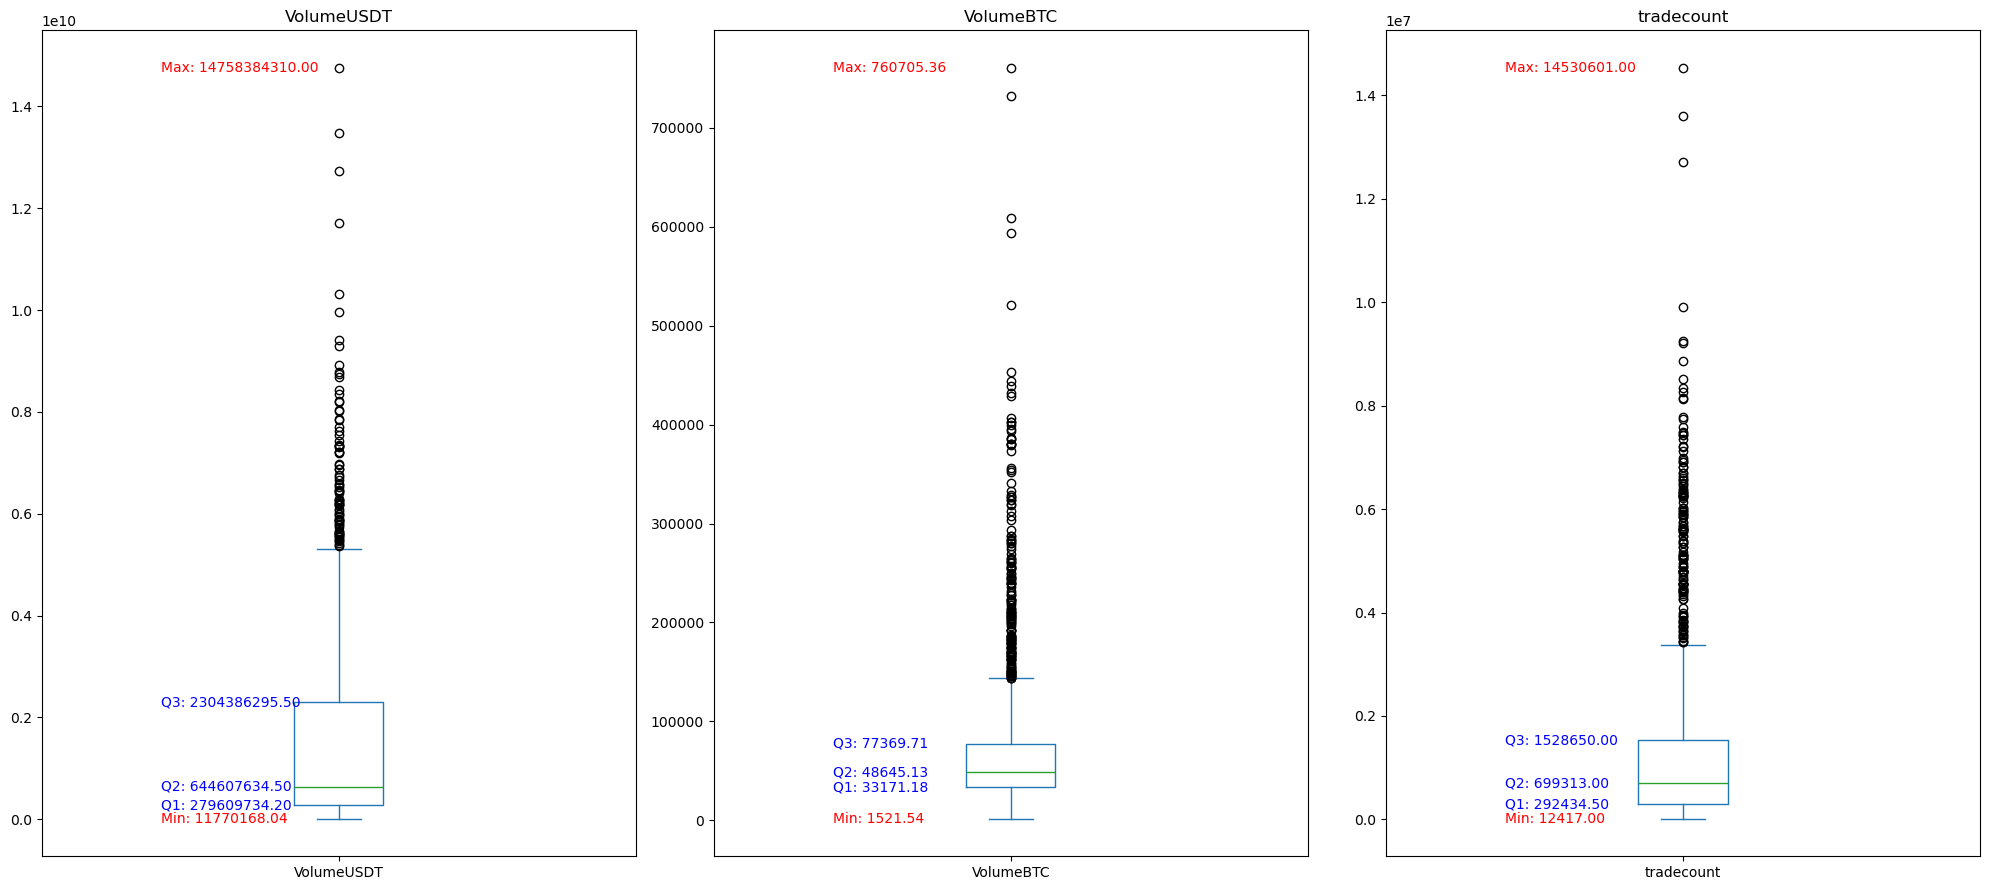

In [23]:
# Method 2 : With text on charts
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 9))
for ax, column_name in zip(axes, ['VolumeUSDT', 'VolumeBTC', 'tradecount']):
    # Plot boxplot
    bt2[column_name].plot.box(ax=ax)

    # Set title
    ax.set_title(column_name)

    # Get quartiles
    q1 = bt2[column_name].quantile(0.25)
    q2 = bt2[column_name].quantile(0.5)
    q3 = bt2[column_name].quantile(0.75)

    # Get min and max
    min_val = bt2[column_name].min()
    max_val = bt2[column_name].max()

    # Add annotations
    ax.text(0.7, q1, f'Q1: {q1:.2f}', verticalalignment='center', color='blue', fontsize=10)
    ax.text(0.7, q2, f'Q2: {q2:.2f}', verticalalignment='center', color='blue', fontsize=10)
    ax.text(0.7, q3, f'Q3: {q3:.2f}', verticalalignment='center', color='blue', fontsize=10)
    ax.text(0.7, min_val, f'Min: {min_val:.2f}', verticalalignment='center', color='red', fontsize=10)
    ax.text(0.7, max_val, f'Max: {max_val:.2f}', verticalalignment='center', color='red', fontsize=10)

plt.tight_layout()
plt.show()

<h2>Question:</h2>
<h4>What to do with outlier data?</h4>
<h7>1- Delete</h7>   

<h7>2- Find the reason ==> Let's check if we can cure the cause or not</h7>

<h7>3- Use from Log function ==> Take the logarithm of the data</h7>


<h2>Step_5 : Data Integration</h2>
<h7>==> There is no need here</h7>

<h2>Step_6 : Data Transformation</h2>
<h7>==> There is no need here</h7>

<h2>Step_7 : Balancing the dataset</h2>
<h7>==> There is no need here, because target is price as type float</h7>

In [24]:
bt.shape

(1807, 13)

In [25]:
bt.nunique()

unix          1807
date          1807
symbol           1
open          1805
high          1760
low           1759
close         1806
VolumeBTC     1807
VolumeUSDT    1807
tradecount    1805
EMA           1807
SMA           1807
RSI           1807
dtype: int64

<Axes: >

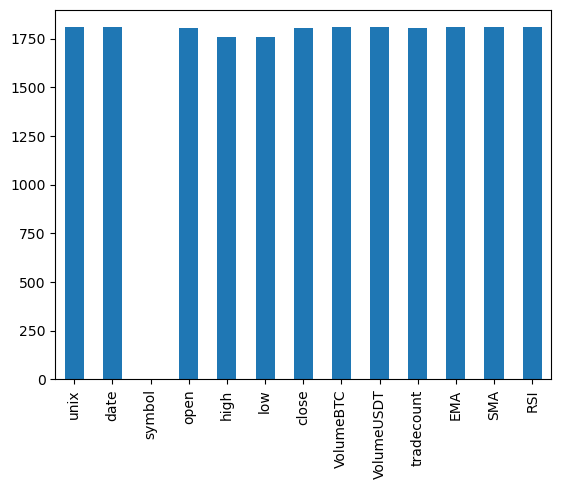

In [26]:
bt.nunique().plot.bar()

<h2>Step_8 : Feature Engineering</h2>

In [27]:
bt.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'VolumeBTC',
       'VolumeUSDT', 'tradecount', 'EMA', 'SMA', 'RSI'],
      dtype='object')

In [28]:
bt3 = bt[['open', 'high', 'low', 'close', 'VolumeBTC', 'VolumeUSDT', 'tradecount', 'EMA', 'SMA', 'RSI']].copy()

In [29]:
bt3.head(1)

,open,high,low,close,VolumeBTC,VolumeUSDT,tradecount,EMA,SMA,RSI
110,18860.04,19300.0,17029.98,18856.25,10624.63307,196339245.7,91956.0,15750.46714,16210.72,79.721319


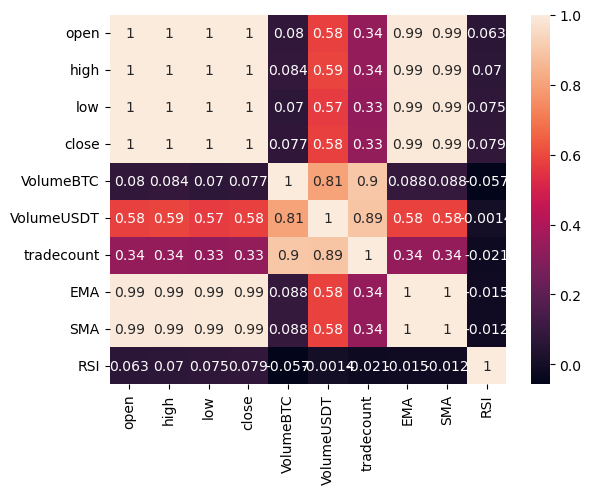

In [30]:
bt_corr = bt3.corr()
sb.heatmap(bt_corr, annot = True)
plt.show()

In [31]:
x = bt[['open', 'high', 'low', 'VolumeUSDT', 'EMA', 'SMA']]
y = bt[['close']]
y_next = y.shift(-1)     # For Tomorrow
y_next.fillna(0, inplace = True)

<h2>Step_9 : Data Augmentation</h2>
<h7>==> There is no need here</h7>

<h2>Step_10 : Data Encoding</h2>
<h7>==> There is no need here</h7>

In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1807 entries, 110 to 1916
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        1807 non-null   float64
 1   high        1807 non-null   float64
 2   low         1807 non-null   float64
 3   VolumeUSDT  1807 non-null   float64
 4   EMA         1807 non-null   float64
 5   SMA         1807 non-null   float64
dtypes: float64(6)
memory usage: 98.8 KB


<h2>Step_11 : Data Normalization</h2>
<h7>==> There is no need here</h7>

<h2>Step_12 : Dimensionality Reduction</h2>
<h7>==> There is no need here</h7>

<h2>Step_13 : Data Splitting</h2>

In [33]:
x_train = x.iloc[0 : 1500, :]
x_test = x.iloc[1500 : 1917, :]
y_next_train = y_next.iloc[0 : 1500, :]
y_next_test = y_next.iloc[1500 : 1917, :]

<h2>Step_14 : Modeling</h2>

In [34]:
model = LinearRegression()
model.fit(x_train, y_next_train)
y_next_pred = model.predict(x_test)

<h2>Step_15 : Performance analysis</h2>

<h4>Types of Metrics:</h5>

In [48]:
MAE = mean_absolute_error(y_next_test, y_next_pred)

MSE = mean_squared_error(y_next_test, y_next_pred)

MAPE = mean_absolute_percentage_error(y_next_test, y_next_pred)

MEAN = np.mean(y_next_test, axis = 0)

RMSE = np.sqrt(MSE)

ME = max_error(y_next_test, y_next_pred)

R2 = r2_score(y_next_test, y_next_pred)
print("R2:", R2)

R2: 0.975803245146197


In [46]:
# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.0f}'.format
pd.DataFrame(
    {
        'MAE (mean_absolute_error)' : MAE,
        'MSE (mean_squared_error)' : MSE,
        'MAPE (mean_absolute_percentage_error)' : MAPE,
        'MEAN' : MEAN,
        'RMSE (Root mean_squared_error)' : RMSE, 
        'ME (Max Error)' : ME,
        'R2' : R2
    }, index = [0]
)

,MAE (mean_absolute_error),MSE (mean_squared_error),MAPE (mean_absolute_percentage_error),MEAN,RMSE (Root mean_squared_error),ME (Max Error),R2
0,909,2312698,239784361806809312,NaN,1521,16346,1


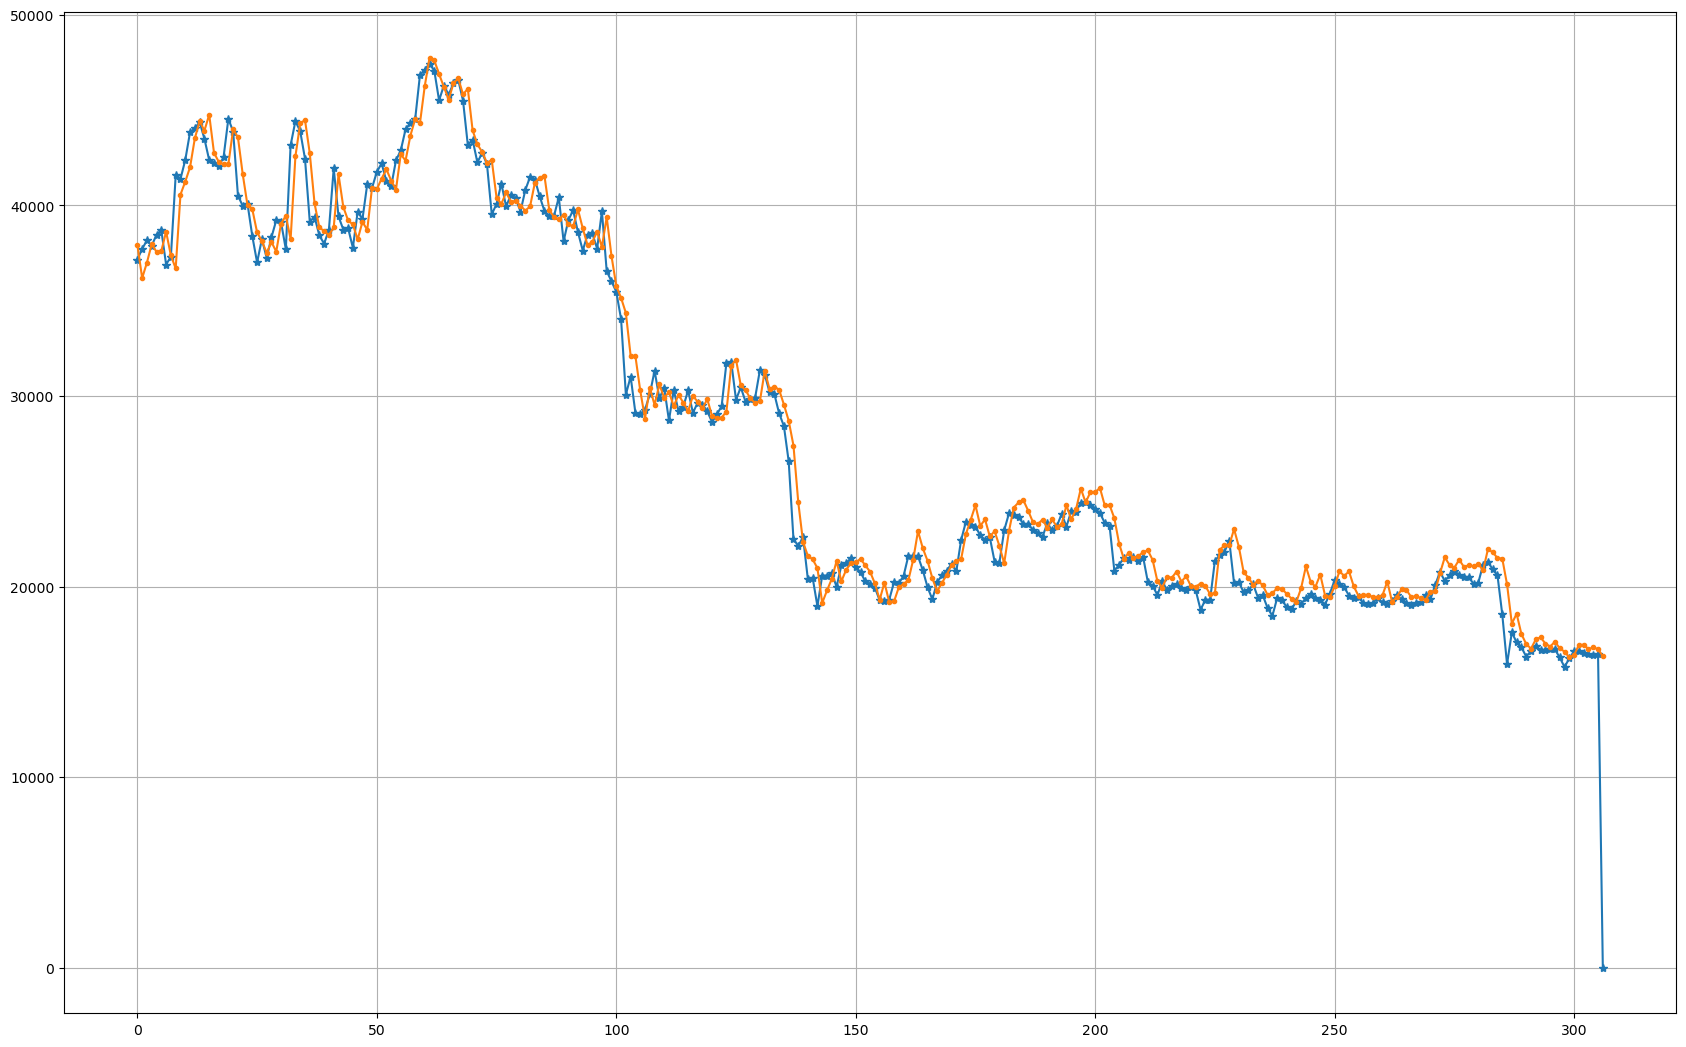

In [52]:
x1 = np.array(range(0, len(y_next_test)))
plt.figure(figsize = (13 * 1.6, 13))
plt.plot(x1, y_next_test.values, marker = '*')
plt.plot(x1, y_next_pred, marker = '.')
plt.grid()
plt.show()

In [70]:
#Ziping the actual and predicted result for comparing
print(y_next_pred.shape)
actual = y_next_test.values[:][300 : 307].flatten()
print(actual.shape)

predicted = y_next_pred[:][300 : 307].flatten()
print(predicted.shape)

print("Actual values[300 : 307] ===>", *actual)
print("Predic values[300 : 307] ===>", *predicted)

df = pd.DataFrame({'actual' : actual, 'pred' : predicted})
df

(307, 1)
(7,)
(7,)
Actual values[300 : 307] ===> 16603.11 16598.95 16522.14 16458.57 16428.78 16472.52 0.0
Predic values[300 : 307] ===> 16406.688296583445 16936.436072514945 16949.957094762183 16720.62970699178 16804.94525352962 16721.66112240572 16345.546932570278


,actual,pred
0,16603,16407
1,16599,16936
2,16522,16950
3,16459,16721
4,16429,16805
5,16473,16722
6,0,16346
